## **VISÃO COMPUTACIONAL - AULA 05**

**Objetivos da aula:**

*   conhecer a transformação de thresholding
*   praticar com o Algoritmo Global
*   praticar com o Algoritmo de Otsu
*   praticar com o Algoritmo Adaptativo










## **TRANSFORMAÇÃO DE THRESHOLDING (LIMIARIZAÇÃO)**

**Thresholding (limiarização ou binarização)** consiste na **quantização** do espaço de cores para **duas cores**, normalmente **preto e branco**. Este é um procedimento bastante comum em Processamento de Imagens e Visão Computacional antes de aplicarmos outros procedimentos como detecção de contornos, reconhecimento de formas, operações morfológicas, dentre outros.

O efeito de um bom threshold é mostrado abaixo:


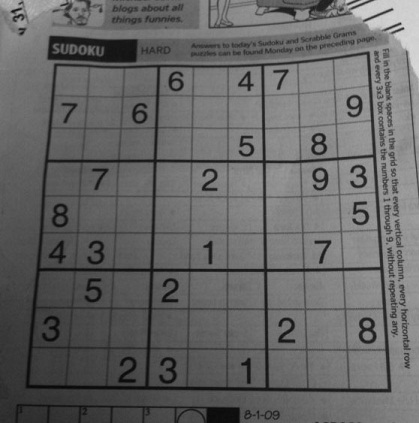

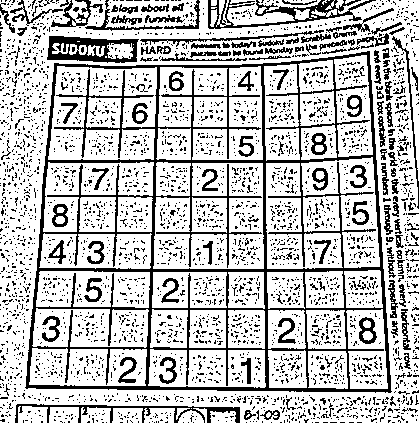

In [2]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.cvtColor(cv.imread('sudoku.jpg'), cv.COLOR_BGR2GRAY)
imgt = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
cv2_imshow(img)
cv2_imshow(imgt)

## **ALGORITMO BÁSICO (GLOBAL) DE THRESHOLDING**

A implementação mais elementar de um algoritmo de thresholding  consiste na definição de um limiar (*threshold*). Valores abaixo deste limiar, são considerados como preto e, valores acima, considerados como brancos.

Em OpenCV, isto pode ser feito segundo o exemplo abaixo, onde fixamos o limiar como 127.



Threshold 127.0


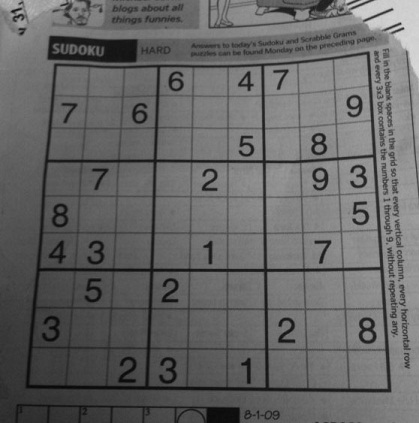

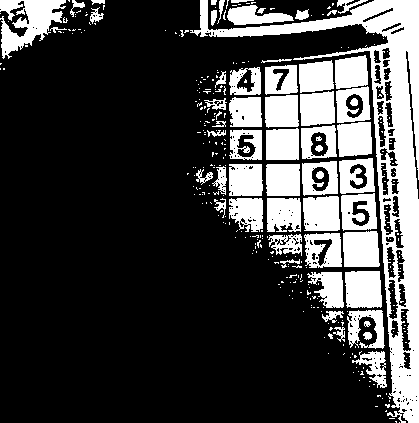

In [3]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.cvtColor(cv.imread('sudoku.jpg'), cv.COLOR_BGR2GRAY)
T,imgt = cv.threshold(img,127,255,cv.THRESH_BINARY)
print("Threshold",T)
cv2_imshow(img)
cv2_imshow(imgt)

## **EXERCÍCIO**

Utilizando o código-base abaixo, implementar um algoritmo de thrsholding que retorne o mesmo resultado da constante cv.THRESH_BINARY, utilizando o mesmo limiar(127).

Threshold 30.0


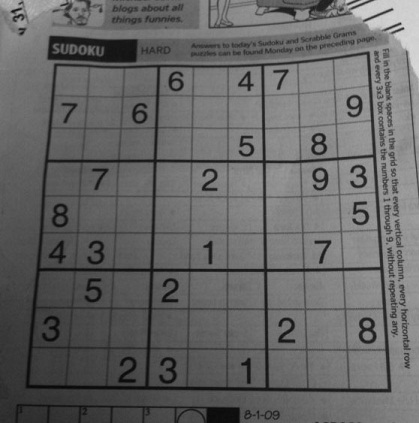

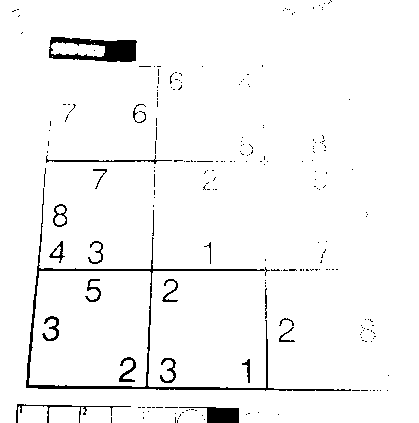

In [8]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.cvtColor(cv.imread('sudoku.jpg'), cv.COLOR_BGR2GRAY)
rows,cols=img.shape
#calcule a imagem imgt aqui

T,imgt = cv.threshold(img,30,255,cv.THRESH_BINARY)
print("Threshold",T)

cv2_imshow(img)
cv2_imshow(imgt)

## **EXERCÍCIO**

O valor de limiar como 127 pode não funcionar para toda imagem. Por exemplo, para imagem mais escuras, com todos os pixels abaixo de 127, a imagem ficaria toda preta. Proponha uma estratégia para melhorar a estimativa do limiar e a implemente abaixo.

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.cvtColor(cv.imread('sudoku.jpg'), cv.COLOR_BGR2GRAY)
rows,cols=img.shape
#calcule a imagem imgt aqui
cv2_imshow(img)
cv2_imshow(imgt)

## **EXERCÍCIO**

Se equalizarmos o histograma da imagem original, conseguiremos melhorar os resultados do alagoritmo básico de thresholding ?

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.cvtColor(cv.imread('sudoku.jpg'), cv.COLOR_BGR2GRAY)
rows,cols=img.shape
#calcule a imagem imgt aqui
cv2_imshow(img)
cv2_imshow(imgt)

## **EXERCÍCIO**

Uma estratégia bem interessante antes de aplicarmos o algoritmo básico de thresholding é "borrar" a imagem. Abaixo, temos um exemplo de como borrar a imagem, utilizando um filtro gaussiano. Aplique o algoritmo de thresholding sobre esta imagem borrada.



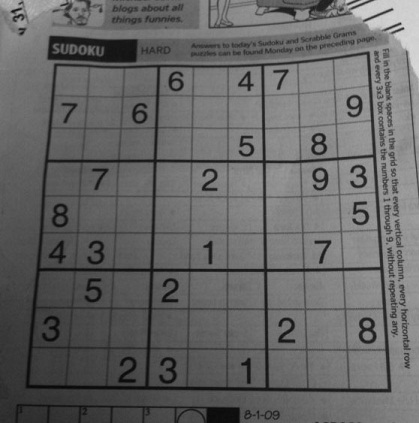

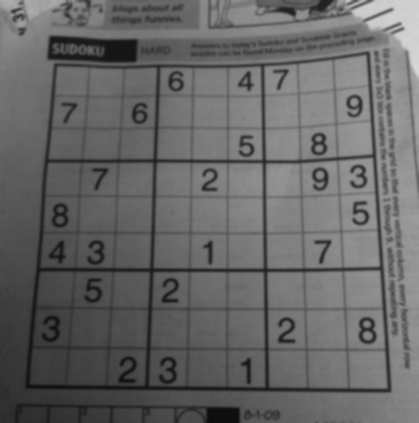

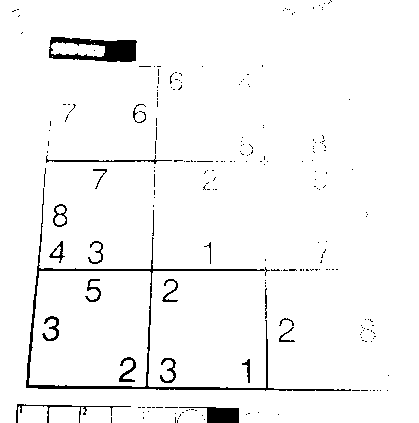

In [9]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.cvtColor(cv.imread('sudoku.jpg'), cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(img,(5,5),0)
#calcule a imagem imgt aqui
cv2_imshow(img)
cv2_imshow(blur)
cv2_imshow(imgt)

## **ALGORITMO DE OTSU**

Nesta estratégia, supomos que o histograma da imagem tenham, um comportamento bimodal. Encontramos dois picos neste histograma e calculamos a média entre eles. Esta média será o valor do nosso threshold.

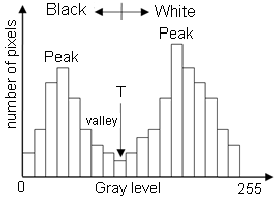

In [31]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.cvtColor(cv.imread('otsu.png'), cv.COLOR_BGR2GRAY)
cv2_imshow(img)

Abaixo, temos um exemplo de aplicação deste algoritmo em OpenCV:

Threshold 96.0


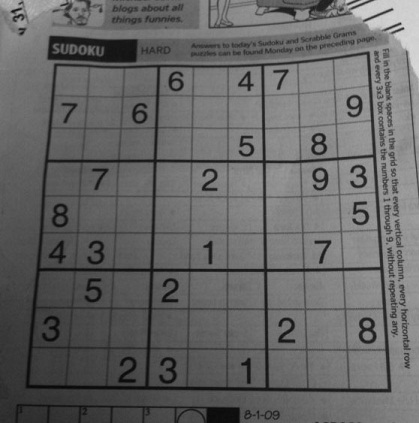

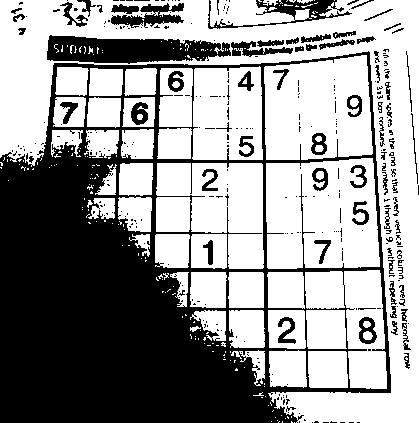

In [32]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.cvtColor(cv.imread('sudoku.jpg'), cv.COLOR_BGR2GRAY)
T,imgt = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print("Threshold",T)
cv2_imshow(img)
cv2_imshow(imgt)

## **DESAFIO PARA CASA**

Implementar o Algoritmo de Otsu para determinar o valor do threshold T. A partir deste valor, usar o algoritmo básico de thresholding.

In [ ]:
#sua solução vai aqui



## **THRESHOLDING ADAPTATIVO**

No thresholding adaptativo, ao invés de considerarmos somente a cor (nível de cinza) do pixel, consideramos uma vizinhança do pixel, aplicamos uma operação nesta vizinhança (média,borramento) e obtemos um novo valor de cor para o pixel, que pode ser modulado por uma contante C. A partir deste novo valor, aplicamos o threshold anterior.

Abaixo temos um exemplo com uma vizinhança de tamanho 3 (um pixel para a direita, um pixel para a esquerda, um pixel para baixo e umpixel para cima) e constante C=4.

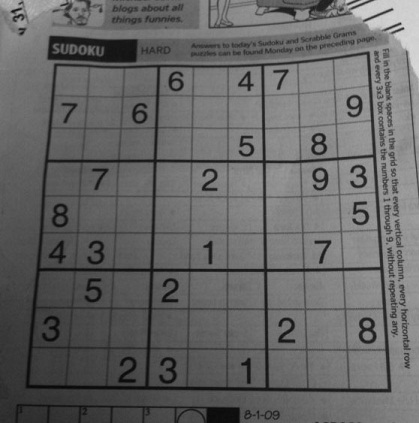

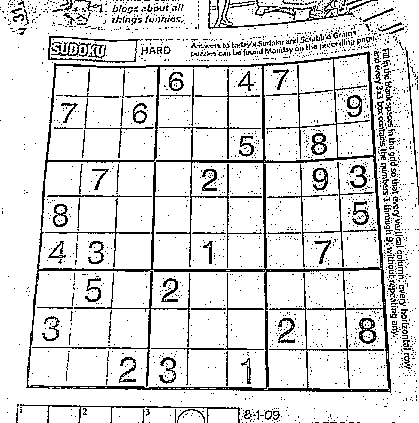

In [12]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.cvtColor(cv.imread('sudoku.jpg'), cv.COLOR_BGR2GRAY)
imgt = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,3,4)
cv2_imshow(img)
cv2_imshow(imgt)

## **EXERCÍCIO**

Qual é a influência do tamanho da vizinhança no resultado do thresholding adaptativo ? 

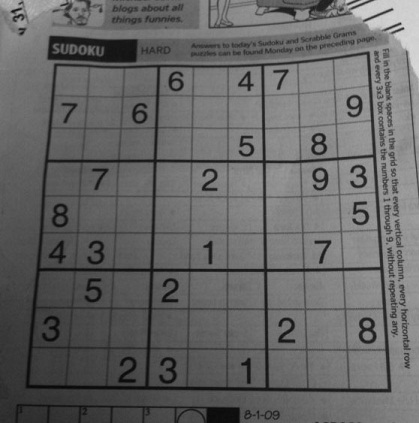

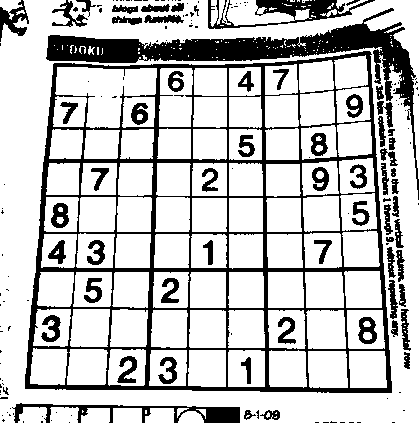

In [30]:
#faça se experimento aqui

import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.cvtColor(cv.imread('sudoku.jpg'), cv.COLOR_BGR2GRAY)
imgt = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,99,4)
cv2_imshow(img)
cv2_imshow(imgt)


#sempre importante notar que queremos o que está próximo

Se incluirmos uma filtragem gaussiana ("borramento") junto com o thrasholding adaptativo, conseguimos um resultado muito melhor.

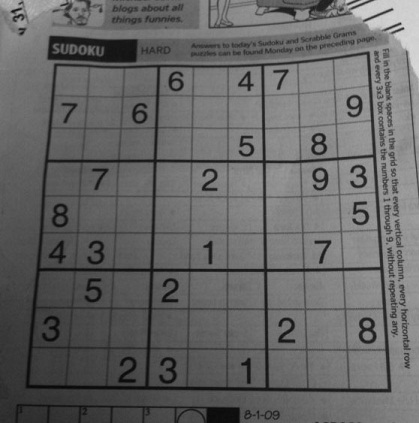

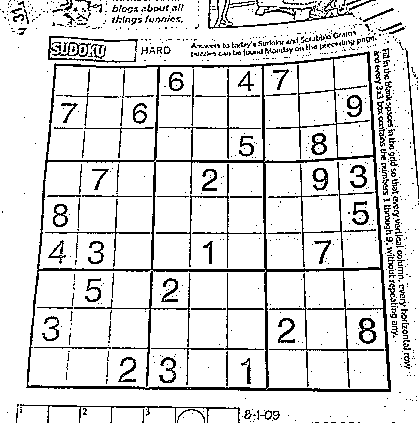

In [29]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.cvtColor(cv.imread('sudoku.jpg'), cv.COLOR_BGR2GRAY)
imgt = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,5,5)
cv2_imshow(img)
cv2_imshow(imgt)